<a href="https://colab.research.google.com/github/deandri3000/Kelompok3-SI4703-DataMining-/blob/main/Kelompok_3_SI4703_DATMIN_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Klasifikasi Logistic Regression**

#### **Data Understanding**

Membaca dan menampilkan beberapa baris awal

In [ ]:
import pandas as pd
df = pd.read_csv("Telco customer churn.csv")
df.head()
print("--- Data Awal Sebelum Cleaning ---")
print(df.head())
print("\nTipe Data Awal:")
print(df.dtypes)
print(f"\nJumlah baris duplikat awal: {df.duplicated().sum()}")
print("Jumlah nilai null awal per kolom:\n", df.isnull().sum())

--- Data Awal Sebelum Cleaning ---
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV S

#### **Data Cleaning**

In [ ]:
df_cleaned = df.copy()

Menghapus Data Duplikat

In [ ]:
print("\n--- Tahap Cleaning 1: Menghapus Data Duplikat ---")
rows_before_deduplication = df_cleaned.shape[0]
df_cleaned.drop_duplicates(inplace=True)
rows_after_deduplication = df_cleaned.shape[0]
print(f"Jumlah baris sebelum deduplikasi: {rows_before_deduplication}")
print(f"Jumlah baris setelah deduplikasi: {rows_after_deduplication}")
print(f"Jumlah duplikat yang dihapus: {rows_before_deduplication - rows_after_deduplication}")


--- Tahap Cleaning 1: Menghapus Data Duplikat ---
Jumlah baris sebelum deduplikasi: 7043
Jumlah baris setelah deduplikasi: 7043
Jumlah duplikat yang dihapus: 0


Mengatasi Kolom 'TotalCharges'


In [ ]:
print("\n--- Tahap Cleaning 2: Mengatasi Kolom 'TotalCharges' ---")
df_cleaned['TotalCharges'] = pd.to_numeric(df_cleaned['TotalCharges'], errors='coerce')

# --- PERBAIKAN: Pastikan total_charges_mean_value_klasifikasi selalu terdefinisi ---
# Hitung rata-rata SEBELUM mengisi NaN, agar representatif dari nilai yang valid.
mean_total_charges_for_imputation = df_cleaned['TotalCharges'].mean()

initial_total_charges_nan_count = df_cleaned['TotalCharges'].isnull().sum()
if initial_total_charges_nan_count > 0:
    df_cleaned['TotalCharges'] = df_cleaned['TotalCharges'].fillna(mean_total_charges_for_imputation)
    print(f"Ditemukan {initial_total_charges_nan_count} nilai NaN di 'TotalCharges'. Diisi dengan rata-rata: {mean_total_charges_for_imputation:.2f}")
else:
    print("Tidak ada nilai NaN yang ditemukan di 'TotalCharges' setelah konversi.")

# Setelah penanganan NaN, nilai rata-rata yang akan disimpan adalah ini.
# Variabel ini sekarang di luar blok if/else sehingga selalu terdefinisi.
total_charges_mean_value_klasifikasi = mean_total_charges_for_imputation


--- Tahap Cleaning 2: Mengatasi Kolom 'TotalCharges' ---
Ditemukan 11 nilai NaN di 'TotalCharges'. Diisi dengan rata-rata: 2283.30


Validasi Rentang Data dan Konsistensi Nilai

In [ ]:
print("\n--- Tahap Cleaning 3: Validasi Rentang Data dan Konsistensi ---")
rows_before_validation = df_cleaned.shape[0]

df_cleaned = df_cleaned[
    (df_cleaned['SeniorCitizen'].isin([0, 1])) & # Pastikan SeniorCitizen hanya 0 atau 1
    (df_cleaned['MonthlyCharges'] >= 0) &        # Pastikan Biaya Bulanan tidak negatif
    (df_cleaned['TotalCharges'] >= 0)            # Pastikan Total Biaya tidak negatif
].copy() # Gunakan .copy() lagi setelah filtering

rows_after_validation = df_cleaned.shape[0]
print(f"Jumlah baris sebelum validasi: {rows_before_validation}")
print(f"Jumlah baris setelah validasi: {rows_after_validation}")
print(f"Jumlah baris yang dihapus karena validasi: {rows_before_validation - rows_after_validation}")


print("\n--- Data Setelah Proses Data Cleaning Selesai ---")
print(df_cleaned.info()) # Menampilkan ringkasan DataFrame setelah cleaning
print("\n", df_cleaned.head()) # Menampilkan beberapa baris pertama setelah cleaning

# Cek akhir nilai null setelah cleaning
print("\nJumlah nilai null setelah cleaning per kolom:\n", df_cleaned.isnull().sum())


--- Tahap Cleaning 3: Validasi Rentang Data dan Konsistensi ---
Jumlah baris sebelum validasi: 7043
Jumlah baris setelah validasi: 7043
Jumlah baris yang dihapus karena validasi: 0

--- Data Setelah Proses Data Cleaning Selesai ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 1

#### **Data Selection**

In [ ]:
print("\n--- Tahap Seleksi Kolom Awal ---")
# Menentukan kolom-kolom yang akan digunakan untuk analisis dan modeling
selected_columns = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
    'MonthlyCharges', 'TotalCharges', 'Churn' # 'Churn' tetap disertakan karena ini adalah target
]

# Memilih hanya kolom-kolom yang diinginkan dari DataFrame
df_cleaned = df_cleaned[selected_columns].copy() # Gunakan .copy() untuk menghindari SettingWithCopyWarning

print("Data setelah seleksi kolom awal:\n", df_cleaned.head())
print(f"Shape data setelah seleksi kolom: {df_cleaned.shape}")


--- Tahap Seleksi Kolom Awal ---
Data setelah seleksi kolom awal:
    gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No

#### **Data Preparation**



Import Library

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc # Tambahkan roc_curve, auc
import joblib # Pastikan ini diimpor!
import matplotlib.pyplot as plt # Diperlukan untuk visualisasi
import seaborn as sns # Diperlukan untuk visualisasi

Konversi Kolom Target 'Churn' ke Numerik (0/1)

In [ ]:
print("\n--- Tahap 1 (Lanjutan): Konversi Kolom Target 'Churn' ke Numerik ---")
# Ubah 'Yes' menjadi 1 dan 'No' menjadi 0
df_cleaned['Churn'] = df_cleaned['Churn'].map({'Yes': 1, 'No': 0}).astype(int)
print("Kolom 'Churn' berhasil dikonversi ke numerik (1=Yes, 0=No).")
print(f"Distribusi 'Churn' setelah konversi:\n{df_cleaned['Churn'].value_counts()}")


--- Tahap 1 (Lanjutan): Konversi Kolom Target 'Churn' ke Numerik ---
Kolom 'Churn' berhasil dikonversi ke numerik (1=Yes, 0=No).
Distribusi 'Churn' setelah konversi:
Churn
0    5174
1    1869
Name: count, dtype: int64


 Memastikan SeniorCitizen sebagai Numerik (0/1)

In [ ]:
# Perbaikan untuk SeniorCitizen: Pastikan ia 0 atau 1 numerik
print("\n--- Pra-pemrosesan Lanjutan: Memastikan SeniorCitizen sebagai Numerik (0/1) ---")
if df_cleaned['SeniorCitizen'].dtype == 'object':
    df_cleaned['SeniorCitizen'] = df_cleaned['SeniorCitizen'].map({'Yes': 1, 'No': 0}).astype(int)
    print("Kolom 'SeniorCitizen' berhasil dikonversi ke numerik (0/1).")
elif df_cleaned['SeniorCitizen'].dtype == 'int64':
    print("Kolom 'SeniorCitizen' sudah bertipe numerik (0/1).")
else:
    print(f"Peringatan: Tipe data 'SeniorCitizen' tidak terduga: {df_cleaned['SeniorCitizen'].dtype}")


--- Pra-pemrosesan Lanjutan: Memastikan SeniorCitizen sebagai Numerik (0/1) ---
Kolom 'SeniorCitizen' sudah bertipe numerik (0/1).


Transformasi Fitur: Label Encoding (Mengubah Kategorikal ke Numerik)

In [ ]:
print("\n--- Tahap 1 (Lanjutan): Label Encoding untuk Kolom Kategorikal ---")
# Dictionary untuk menyimpan setiap objek LabelEncoder yang sudah di-fit
label_encoders_dict_klasifikasi = {}

# Daftar kolom kategorikal yang perlu di-encode (selain 'customerID' dan 'Churn')
# Ambil dari df_cleaned setelah seleksi kolom dan cleaning awal
categorical_cols_to_encode = [col for col in df_cleaned.select_dtypes(include='object').columns if col != 'Churn']

for col in categorical_cols_to_encode:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders_dict_klasifikasi[col] = le

print("Kolom kategorikal telah di-encode menjadi numerik.")
print("\nTipe Data setelah Label Encoding (lanjutan):\n", df_cleaned.dtypes)
print("\nKolom bertipe 'object' yang tersisa (jika ada):", df_cleaned.select_dtypes(include='object').columns.tolist())


--- Tahap 1 (Lanjutan): Label Encoding untuk Kolom Kategorikal ---
Kolom kategorikal telah di-encode menjadi numerik.

Tipe Data setelah Label Encoding (lanjutan):
 gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

Kolom bertipe 'object' yang tersisa (jika ada): []


Transformasi Fitur: Normalisasi (MinMaxScaler)

In [ ]:
print("\n--- Tahap 2 (Lanjutan): Normalisasi Kolom Numerik (MinMaxScaler) ---")
# Inisialisasi MinMaxScaler. Ini akan menskalakan fitur ke rentang [0, 1].
scaler_minmax_klasifikasi = MinMaxScaler() # Penamaan spesifik untuk klasifikasi.
# Mendefinisikan kolom-kolom numerik yang akan dinormalisasi.
columns_to_scale_minmax = ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']
# Melatih MinMaxScaler dan mentransformasi kolom-kolom terpilih.
df_cleaned[columns_to_scale_minmax] = scaler_minmax_klasifikasi.fit_transform(df_cleaned[columns_to_scale_minmax])
print("Kolom numerik terpilih telah dinormalisasi ke rentang [0, 1].")

print("\n--- Hasil Pra-pemrosesan Lanjutan (df_cleaned head) ---")
print("Data yang telah ditransformasi:")
print(df_cleaned.head())
print("\nTipe Data setelah semua transformasi lanjutan:")
print(df_cleaned.dtypes)


--- Tahap 2 (Lanjutan): Normalisasi Kolom Numerik (MinMaxScaler) ---
Kolom numerik terpilih telah dinormalisasi ke rentang [0, 1].

--- Hasil Pra-pemrosesan Lanjutan (df_cleaned head) ---
Data yang telah ditransformasi:
   gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0       0            0.0        1           0  0.013889             0   
1       1            0.0        0           0  0.472222             1   
2       1            0.0        0           0  0.027778             1   
3       1            0.0        0           0  0.625000             0   
4       0            0.0        0           0  0.027778             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4    

Pemisahan Fitur (X) dan Target (y)

In [ ]:
print("\n--- Tahap 3: Pemisahan Fitur (X) dan Target (y) ---")
# Memisahkan fitur (X) dari variabel target ('Churn').
# 'customerID' sudah tidak ada setelah seleksi kolom awal.
X = df_cleaned.drop(columns=["Churn"], errors='ignore')
y = df_cleaned["Churn"] # Variabel target.
print(f"Shape of X sebelum SMOTE: {X.shape}")
print(f"Shape of y sebelum SMOTE: {y.shape}")
print("Distribusi kelas sebelum balancing:\n", pd.Series(y).value_counts())


--- Tahap 3: Pemisahan Fitur (X) dan Target (y) ---
Shape of X sebelum SMOTE: (7043, 19)
Shape of y sebelum SMOTE: (7043,)
Distribusi kelas sebelum balancing:
 Churn
0    5174
1    1869
Name: count, dtype: int64


Penanganan Data Imbalance: SMOTE (Synthetic Minority Over-sampling Technique)

In [ ]:
print("\n--- Tahap 4: Balancing Kelas dengan SMOTE ---")
# SMOTE menghasilkan sampel baru dari kelas minoritas untuk menyeimbangkan dataset.
smote_klasifikasi = SMOTE(random_state=42) # Inisialisasi objek SMOTE.
X_resampled, y_resampled = smote_klasifikasi.fit_resample(X, y)
print(f"Shape of X_resampled setelah SMOTE: {X_resampled.shape}")
print(f"Shape of y_resampled setelah SMOTE: {y_resampled.shape}")
print("Distribusi kelas setelah balancing:\n", pd.Series(y_resampled).value_counts())


--- Tahap 4: Balancing Kelas dengan SMOTE ---
Shape of X_resampled setelah SMOTE: (10348, 19)
Shape of y_resampled setelah SMOTE: (10348,)
Distribusi kelas setelah balancing:
 Churn
0    5174
1    5174
Name: count, dtype: int64


Transformasi Fitur: Standarisasi (StandardScaler)

In [ ]:
print("\n--- Tahap 5: Standarisasi Fitur (StandardScaler) ---")
# StandardScaler menskalakan fitur agar memiliki rata-rata 0 dan standar deviasi 1.
# Penting dilakukan setelah SMOTE dan sebelum PCA.
scaler_standard_klasifikasi = StandardScaler() # Inisialisasi objek StandardScaler.
# Melatih StandardScaler dan mentransformasi data hasil SMOTE.
X_resampled_scaled = scaler_standard_klasifikasi.fit_transform(X_resampled)
print(f"Shape of X_resampled_scaled (setelah Standarisasi): {X_resampled_scaled.shape}")
print("5 baris pertama X_resampled_scaled (array NumPy, contoh):\n", X_resampled_scaled[:5])


--- Tahap 5: Standarisasi Fitur (StandardScaler) ---
Shape of X_resampled_scaled (setelah Standarisasi): (10348, 19)
5 baris pertama X_resampled_scaled (array NumPy, contoh):
 [[-0.93105268 -0.4964722   1.21060755 -0.54339765 -1.12296232 -3.06935606
   0.04304876 -1.25260078 -0.7692576   1.33457237 -0.91360114 -0.77460211
  -1.06894251 -1.06369229 -0.64371799  0.77659409  0.40186886 -1.33846042
  -0.93152831]
 [ 1.07405308 -0.4964722  -0.82603152 -0.54339765  0.27423719  0.32580124
  -1.00758466 -1.25260078  1.61049656 -0.90660823  1.32269563 -0.77460211
  -1.06894251 -1.06369229  0.66625128 -1.28767398  1.39602112 -0.39432211
  -0.06671559]
 [ 1.07405308 -0.4964722  -0.82603152 -0.54339765 -1.08062294  0.32580124
  -1.00758466 -1.25260078  1.61049656  1.33457237 -0.91360114 -0.77460211
  -1.06894251 -1.06369229 -0.64371799  0.77659409  1.39602112 -0.50232317
  -0.89511563]
 [ 1.07405308 -0.4964722  -0.82603152 -0.54339765  0.73997037 -3.06935606
   0.04304876 -1.25260078  1.61049656 

Reduksi Dimensi: PCA (Principal Component Analysis)

In [ ]:
print("\n--- Tahap 6: Reduksi Dimensi (PCA) ---")
# PCA mengurangi jumlah fitur sambil mempertahankan varians terbanyak.
# n_components=2 dipilih untuk visualisasi 2D atau untuk model yang hanya membutuhkan 2 fitur utama.
pca_klasifikasi = PCA(n_components=2, random_state=42) # Inisialisasi objek PCA.
# Melatih PCA dan mentransformasi data yang sudah distandardisasi.
X_pca_result = pca_klasifikasi.fit_transform(X_resampled_scaled)
print(f"Shape of X_pca_result (setelah PCA): {X_pca_result.shape}")

# Mengkonversi hasil PCA ke DataFrame untuk tampilan yang lebih mudah dibaca.
df_pca_display = pd.DataFrame(data=X_pca_result, columns=['PCA 1', 'PCA 2'])
print("\nHasil Reduksi Dimensi (PCA):")
print(df_pca_display.head())


--- Tahap 6: Reduksi Dimensi (PCA) ---
Shape of X_pca_result (setelah PCA): (10348, 2)

Hasil Reduksi Dimensi (PCA):
      PCA 1     PCA 2
0 -2.150955 -0.610547
1 -0.743532 -1.622606
2 -2.176520 -0.699838
3  0.509842 -2.329522
4 -2.864382  0.383379


#### **Modeling Regresi**



Train-Test Split

In [ ]:
print("\n--- Tahap 7: Pembagian Data Training dan Testing ---")
# Membagi data menjadi set pelatihan (70%) dan set pengujian (30%).
X_train, X_test, y_train, y_test = train_test_split(X_pca_result, y_resampled, test_size=0.3, random_state=42)

print(f"Shape X_train: {X_train.shape}, Shape X_test: {X_test.shape}")
print(f"Shape y_train: {y_train.shape}, Shape y_test: {y_test.shape}")

print("\nDistribusi kelas di data training (y_train):")
print(y_train.value_counts(normalize=True))
print("\nDistribusi kelas di data testing (y_test):")
print(y_test.value_counts(normalize=True))


--- Tahap 7: Pembagian Data Training dan Testing ---
Shape X_train: (7243, 2), Shape X_test: (3105, 2)
Shape y_train: (7243,), Shape y_test: (3105,)

Distribusi kelas di data training (y_train):
Churn
1    0.502968
0    0.497032
Name: proportion, dtype: float64

Distribusi kelas di data testing (y_test):
Churn
0    0.506924
1    0.493076
Name: proportion, dtype: float64


Pelatihan Model Klasifikasi (Logistic Regression)

In [ ]:
print("\n--- Tahap 8: Pelatihan Model Klasifikasi ---")
# Inisialisasi dan latih model Regresi Logistik.
logistic_model = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000)
logistic_model.fit(X_train, y_train)
print("Model Regresi Logistik telah dilatih.")


--- Tahap 8: Pelatihan Model Klasifikasi ---
Model Regresi Logistik telah dilatih.


Evaluasi Model dengan Cross-Validation

In [ ]:
print("\n--- Tahap 9: Evaluasi Model dengan 10-Fold Cross-Validation ---")
# Melakukan 10-Fold Cross-Validation pada data hasil PCA dan SMOTE.
cv_scores = cross_val_score(logistic_model, X_pca_result, y_resampled, cv=10, scoring='accuracy')

print(f"Rata-rata Akurasi CV (10-Fold): {cv_scores.mean():.4f} (+/- {cv_scores.std()*2:.4f})")
print("-" * 35)


--- Tahap 9: Evaluasi Model dengan 10-Fold Cross-Validation ---
Rata-rata Akurasi CV (10-Fold): 0.7635 (+/- 0.0380)
-----------------------------------


#### **Evaluasi Model pada Test Set**


--- Tahap 10: Prediksi dan Evaluasi Metrik Model pada Test Set ---
MSE: 0.2264
Accuracy: 0.7736
Precision: 0.7524
Recall: 0.8060
F1 Score: 0.7783
ROC AUC Score: 0.8483


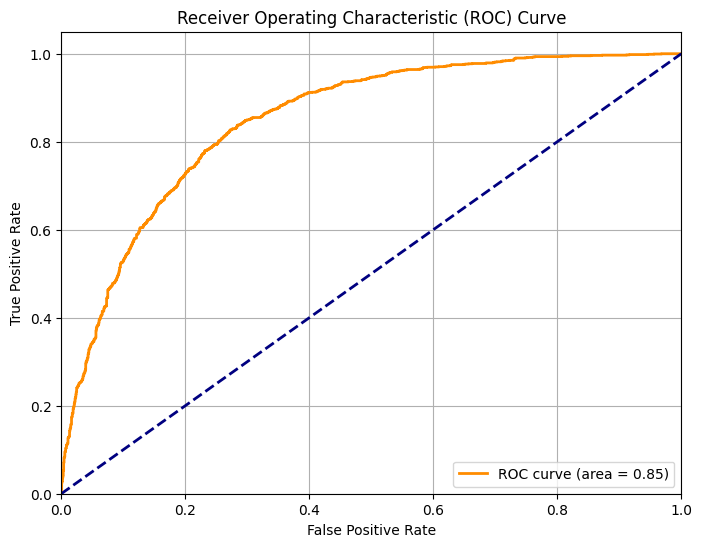

ROC AUC Score: 0.8483


In [ ]:
print("\n--- Tahap 10: Prediksi dan Evaluasi Metrik Model pada Test Set ---")
# Membuat prediksi pada set pengujian.
y_pred = logistic_model.predict(X_test)
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1] # Probabilitas untuk ROC AUC.

# Menghitung dan menampilkan metrik evaluasi.
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")

#### **Penyimpanan Model dan preparation untuk Deployment**

In [ ]:
# File .pkl pertama: Membuat dictionary yang berisi semua objek pra-pemrosesan yang sudah di-fit.
# File .pkl pertama: Semua objek pra-pemrosesan dalam satu dictionary
preprocessing_assets_klasifikasi = {
    'total_charges_mean': total_charges_mean_value_klasifikasi,
    'label_encoders': label_encoders_dict_klasifikasi,
    'minmax_scaler': scaler_minmax_klasifikasi,
    # 'smote_transformer': smote_klasifikasi, # Tidak perlu disimpan karena SMOTE hanya untuk pelatihan
                                              # tidak untuk transformasi input tunggal saat deployment
    'standard_scaler': scaler_standard_klasifikasi,
    'pca': pca_klasifikasi
}

try:
    joblib.dump(preprocessing_assets_klasifikasi, 'preprocessing_assets_klasifikasi.pkl')
    print("File 'preprocessing_assets_klasifikasi.pkl' (berisi semua scaler, encoders, PCA, mean) telah disimpan.")
except Exception as e:
    print(f"Gagal menyimpan preprocessing_assets_klasifikasi.pkl: {e}")


# File .pkl kedua: Model Klasifikasi
try:
    joblib.dump(logistic_model, 'model_klasifikasi.pkl')
    print("File 'model_klasifikasi.pkl' (model Regresi Logistik) telah disimpan.")
except Exception as e:
    print(f"Gagal menyimpan model_klasifikasi.pkl: {e}")

File 'preprocessing_assets_klasifikasi.pkl' (berisi semua scaler, encoders, PCA, mean) telah disimpan.
File 'model_klasifikasi.pkl' (model Regresi Logistik) telah disimpan.


#### **K- Means Clustering**

Import

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

#### **Data understanding (Memuat Data Awal untuk Clustering)**

In [ ]:
df_2 = pd.read_csv('Telco customer churn.csv')
print("--- Data Awal untuk Clustering (df_2 head) ---")
print(df_2.head())
print("\nTipe Data Awal:")
print(df_2.dtypes)
print(f"\nJumlah baris duplikat: {df_2.duplicated().sum()}")
print("Jumlah nilai null per kolom:\n", df_2.isnull().sum())


--- Data Awal untuk Clustering (df_2 head) ---
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport S

#### **Data Cleaning Clustering**

In [ ]:
## ======== 1. Menghapus Data Duplikat ========
df_cleaned_clustering = df_2.copy()
print("\n--- Tahap Cleaning 1 (Clustering): Menghapus Data Duplikat ---")
rows_before_deduplication = df_cleaned_clustering.shape[0]
df_cleaned_clustering.drop_duplicates(inplace=True)
rows_after_deduplication = df_cleaned_clustering.shape[0]
print(f"Jumlah baris sebelum deduplikasi: {rows_before_deduplication}")
print(f"Jumlah baris setelah deduplikasi: {rows_after_deduplication}")
print(f"Jumlah duplikat yang dihapus: {rows_before_deduplication - rows_after_deduplication}")


--- Tahap Cleaning 1 (Clustering): Menghapus Data Duplikat ---
Jumlah baris sebelum deduplikasi: 7043
Jumlah baris setelah deduplikasi: 7043
Jumlah duplikat yang dihapus: 0


Mengatasi Kolom 'TotalCharges' (Konversi Tipe & Mengisi Missing Values)

In [ ]:
print("\n--- Tahap Cleaning 2 (Clustering): Mengatasi Kolom 'TotalCharges' ---")
df_cleaned_clustering['TotalCharges'] = pd.to_numeric(df_cleaned_clustering['TotalCharges'], errors='coerce')

# Hitung rata-rata SEBELUM mengisi NaN, agar representatif dari nilai yang valid.
mean_total_charges_for_imputation_clustering = df_cleaned_clustering['TotalCharges'].mean()

initial_total_charges_nan_count = df_cleaned_clustering['TotalCharges'].isnull().sum()
if initial_total_charges_nan_count > 0:
    df_cleaned_clustering['TotalCharges'] = df_cleaned_clustering['TotalCharges'].fillna(mean_total_charges_for_imputation_clustering)
    print(f"Ditemukan {initial_total_charges_nan_count} nilai NaN di 'TotalCharges'. Diisi dengan rata-rata: {mean_total_charges_for_imputation_clustering:.2f}")
else:
    print("Tidak ada nilai NaN yang ditemukan di 'TotalCharges' setelah konversi.")

# Simpan nilai rata-rata TotalCharges ini untuk deployment
total_charges_mean_value_clustering = mean_total_charges_for_imputation_clustering


--- Tahap Cleaning 2 (Clustering): Mengatasi Kolom 'TotalCharges' ---
Ditemukan 11 nilai NaN di 'TotalCharges'. Diisi dengan rata-rata: 2283.30


Validasi Rentang Data dan Konsistensi Nilai

In [ ]:
print("\n--- Tahap Cleaning 3 (Clustering): Validasi Rentang Data dan Konsistensi ---")
rows_before_validation = df_cleaned_clustering.shape[0]

df_cleaned_clustering = df_cleaned_clustering[
    (df_cleaned_clustering['SeniorCitizen'].isin([0, 1])) &
    (df_cleaned_clustering['MonthlyCharges'] >= 0) &
    (df_cleaned_clustering['TotalCharges'] >= 0)
].copy()

rows_after_validation = df_cleaned_clustering.shape[0]
print(f"Jumlah baris sebelum validasi: {rows_before_validation}")
print(f"Jumlah baris setelah validasi: {rows_after_validation}")
print(f"Jumlah baris yang dihapus karena validasi: {rows_before_validation - rows_after_validation}")


print("\n--- Data Setelah Proses Data Cleaning untuk Clustering Selesai ---")
print(df_cleaned_clustering.info())
print("\n", df_cleaned_clustering.head())
print("\nJumlah nilai null setelah cleaning per kolom:\n", df_cleaned_clustering.isnull().sum())


--- Tahap Cleaning 3 (Clustering): Validasi Rentang Data dan Konsistensi ---
Jumlah baris sebelum validasi: 7043
Jumlah baris setelah validasi: 7043
Jumlah baris yang dihapus karena validasi: 0

--- Data Setelah Proses Data Cleaning untuk Clustering Selesai ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtecti

#### **Data Selection Clustering**

In [ ]:
print("\n--- Tahap Seleksi Kolom Awal untuk Clustering ---")
# Menentukan kolom-kolom yang akan digunakan untuk analisis dan clustering
# 'Churn' tidak disertakan karena ini adalah unsupervised learning. 'customerID' juga tidak disertakan.
selected_columns_clustering = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
    'MonthlyCharges', 'TotalCharges' # 'Churn' tidak disertakan di sini
]

# Memilih hanya kolom-kolom yang diinginkan dari DataFrame
df_cleaned_clustering = df_cleaned_clustering[selected_columns_clustering].copy()

print("Data setelah seleksi kolom awal untuk Clustering:\n", df_cleaned_clustering.head())
print(f"Shape data setelah seleksi kolom: {df_cleaned_clustering.shape}")


--- Tahap Seleksi Kolom Awal untuk Clustering ---
Data setelah seleksi kolom awal untuk Clustering:
    gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0       

#### **Data Preprocessing Clustering**

Transformasi Fitur: Label Encoding (Mengubah Kategorikal ke Numerik)

In [ ]:
print("\n--- Tahap 1 (Lanjutan, Clustering): Label Encoding untuk Kolom Kategorikal ---")
# Dictionary untuk menyimpan setiap objek LabelEncoder yang sudah di-fit
label_encoders_dict_clustering = {}

# Iterasi melalui semua kolom bertipe 'object' (kategorikal)
for col in df_cleaned_clustering.select_dtypes(include='object').columns:
    le = LabelEncoder() # Buat instance LabelEncoder baru untuk setiap kolom
    df_cleaned_clustering[col] = le.fit_transform(df_cleaned_clustering[col])
    # Simpan objek LabelEncoder yang sudah di-fit untuk kolom ini
    label_encoders_dict_clustering[col] = le

print("Kolom kategorikal telah di-encode menjadi numerik.")
print("\nTipe Data setelah Label Encoding (lanjutan, Clustering):\n", df_cleaned_clustering.dtypes)
print("\nKolom bertipe 'object' yang tersisa (jika ada):", df_cleaned_clustering.select_dtypes(include='object').columns.tolist())


--- Tahap 1 (Lanjutan, Clustering): Label Encoding untuk Kolom Kategorikal ---
Kolom kategorikal telah di-encode menjadi numerik.

Tipe Data setelah Label Encoding (lanjutan, Clustering):
 gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
dtype: object

Kolom bertipe 'object' yang tersisa (jika ada): []


Transformasi Fitur: Standarisasi (StandardScaler)

In [ ]:
print("\n--- Tahap 2 (Lanjutan, Clustering): Standarisasi Fitur (StandardScaler) ---")
# StandardScaler menskalakan fitur agar memiliki rata-rata 0 dan standar deviasi 1.
# Penting dilakukan sebelum PCA.
scaler_standard_clustering = StandardScaler() # Inisialisasi objek StandardScaler
X_scaled_clustering = scaler_standard_clustering.fit_transform(df_cleaned_clustering)
print(f"Shape X_scaled_clustering (setelah Standarisasi): {X_scaled_clustering.shape}")
print("5 baris pertama X_scaled_clustering (array NumPy, contoh):\n", X_scaled_clustering[:5])


--- Tahap 2 (Lanjutan, Clustering): Standarisasi Fitur (StandardScaler) ---
Shape X_scaled_clustering (setelah Standarisasi): (7043, 19)
5 baris pertama X_scaled_clustering (array NumPy, contoh):
 [[-1.00955867 -0.43991649  1.03453023 -0.65401193 -1.27744458 -3.05401039
   0.06272275 -1.18323364 -0.91883775  1.24254983 -1.02791014 -0.92526212
  -1.11349541 -1.12140513 -0.8282069   0.8297975   0.39855772 -1.16032292
  -0.99497138]
 [ 0.99053183 -0.43991649 -0.96662231 -0.65401193  0.06632742  0.32743831
  -0.9915883  -1.18323364  1.40732123 -1.02991925  1.24511061 -0.92526212
  -1.11349541 -1.12140513  0.37127103 -1.20511329  1.33486261 -0.25962894
  -0.17387565]
 [ 0.99053183 -0.43991649 -0.96662231 -0.65401193 -1.23672422  0.32743831
  -0.9915883  -1.18323364  1.40732123  1.24254983 -1.02791014 -0.92526212
  -1.11349541 -1.12140513 -0.8282069   0.8297975   1.33486261 -0.36266036
  -0.96039939]
 [ 0.99053183 -0.43991649 -0.96662231 -0.65401193  0.51425142 -3.05401039
   0.06272275 -1.

Reduksi Dimensi: PCA (Principal Component Analysis)

In [ ]:
print("\n--- Tahap 5: Reduksi Dimensi (PCA) untuk Clustering ---")
# Reduksi menjadi 2 komponen untuk visualisasi.
pca_clustering = PCA(n_components=2, random_state=42)
X_pca_clustering = pca_clustering.fit_transform(X_scaled_clustering)
print(f"Shape X setelah PCA: {X_pca_clustering.shape}")

# Konversi hasil PCA ke DataFrame untuk kemudahan visualisasi
df_pca_clustering_display = pd.DataFrame(data=X_pca_clustering, columns=['PC1', 'PC2'])
print("\nHasil Reduksi Dimensi (PCA) untuk Clustering:")
print(df_pca_clustering_display.head())


--- Tahap 5: Reduksi Dimensi (PCA) untuk Clustering ---
Shape X setelah PCA: (7043, 2)

Hasil Reduksi Dimensi (PCA) untuk Clustering:
        PC1       PC2
0 -2.375273  0.162112
1 -1.177145 -1.058310
2 -2.478350 -0.006004
3  0.054753 -1.648241
4 -3.117902  0.874633


#### **Build Model K-Means**

Menentukan Jumlah Cluster Optimal (Metode Elbow)

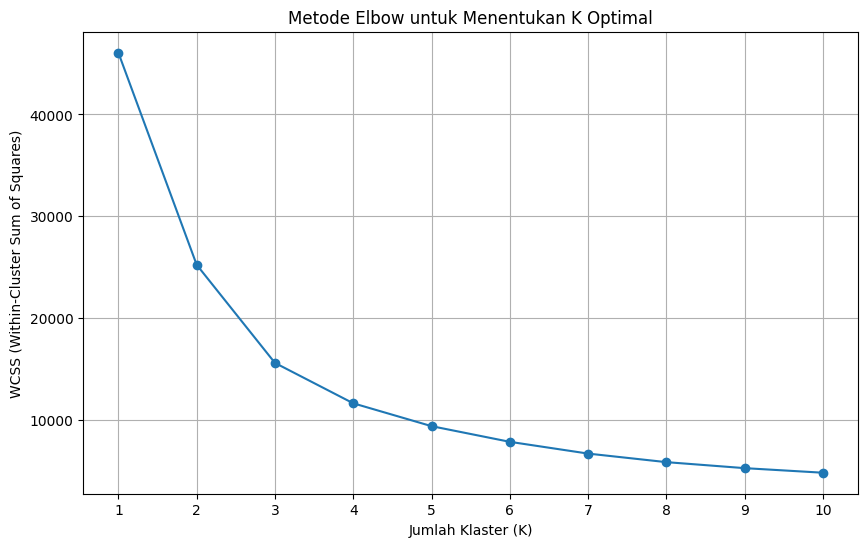

Grafik Metode Elbow telah ditampilkan. Cari 'siku' untuk K optimal.


In [ ]:
wcss = [] # Sum of Squared Errors
k_range = range(1, 11) # Mencoba jumlah cluster dari 1 hingga 10

for k in k_range:
    # n_init='auto' atau nilai integer seperti 10 disarankan di versi scikit-learn terbaru
    kmeans_model_elbow = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_model_elbow.fit(X_pca_clustering) # Gunakan data PCA untuk clustering
    wcss.append(kmeans_model_elbow.inertia_)

# Visualisasi Metode Elbow
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o')
plt.title("Metode Elbow untuk Menentukan K Optimal")
plt.xlabel("Jumlah Klaster (K)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.grid(True)
plt.xticks(k_range)
plt.show()
print("Grafik Metode Elbow telah ditampilkan. Cari 'siku' untuk K optimal.")

Menentukan Jumlah Cluster Optimal (Silhouette Method)


--- Menentukan Jumlah Cluster Optimal (Metode Silhouette) ---


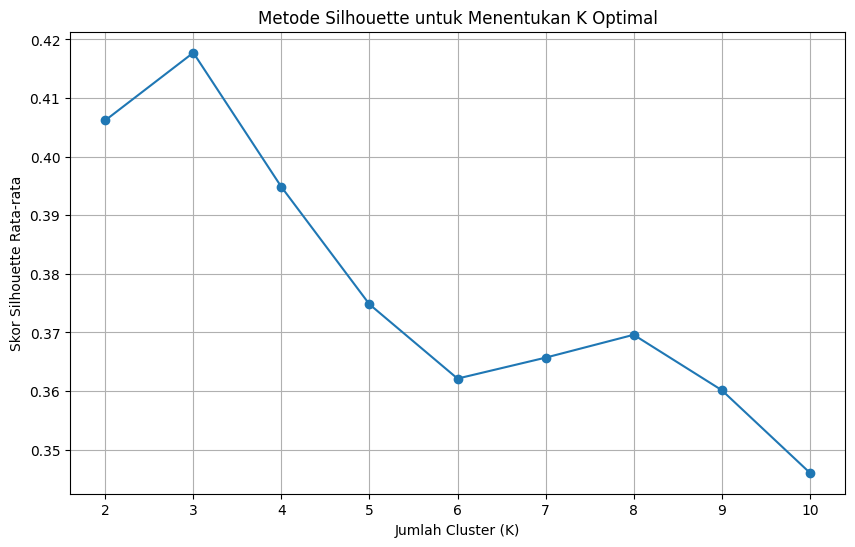

Grafik Metode Silhouette telah ditampilkan. K optimal adalah yang memberikan skor tertinggi.


In [ ]:
print("\n--- Menentukan Jumlah Cluster Optimal (Metode Silhouette) ---")
silhouette_scores = []
k_range_silhouette = range(2, 11) # Silhouette score membutuhkan minimal 2 cluster

for k in k_range_silhouette:
    kmeans_model_silhouette = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels_silhouette = kmeans_model_silhouette.fit_predict(X_pca_clustering)
    silhouette_avg = silhouette_score(X_pca_clustering, cluster_labels_silhouette)
    silhouette_scores.append(silhouette_avg)

# Visualisasi Metode Silhouette
plt.figure(figsize=(10, 6))
plt.plot(k_range_silhouette, silhouette_scores, marker='o')
plt.title('Metode Silhouette untuk Menentukan K Optimal')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Skor Silhouette Rata-rata')
plt.grid(True)
plt.xticks(k_range_silhouette)
plt.show()
print("Grafik Metode Silhouette telah ditampilkan. K optimal adalah yang memberikan skor tertinggi.")

Melatih Model K-Means dengan K Optimal

In [ ]:
print("\nMelatih Model K-Means Final ---")
# Ganti 'optimal_k_chosen' dengan nilai K yang Anda pilih berdasarkan analisis Elbow dan Silhouette.
optimal_k_chosen = 3

kmeans_final_model = KMeans(n_clusters=optimal_k_chosen, random_state=42, n_init=10)
cluster_labels_final = kmeans_final_model.fit_predict(X_pca_clustering)

print(f"Model K-Means telah dilatih dengan K = {optimal_k_chosen} cluster.")
print("Jumlah data per cluster:")
print(pd.Series(cluster_labels_final).value_counts())


Melatih Model K-Means Final ---
Model K-Means telah dilatih dengan K = 3 cluster.
Jumlah data per cluster:
1    2859
0    2113
2    2071
Name: count, dtype: int64


Penambahan Kode untuk Profiling Clustering

In [ ]:


df_features_for_profiling = df_cleaned_clustering.copy()
df_features_for_profiling['Cluster'] = cluster_labels_final

# Lakukan profiling untuk setiap cluster
cluster_profiles = df_features_for_profiling.groupby('Cluster').mean()

# Untuk presentasi yang lebih baik, konversi kembali nilai-nilai yang di-encode ke label aslinya
# Anda akan memerlukan label_encoders_dict_clustering untuk ini
# Misalnya:
for col, le in label_encoders_dict_clustering.items():
     if col in cluster_profiles.columns:
        cluster_profiles[col] = cluster_profiles[col].apply(lambda x: le.inverse_transform([int(round(x))])[0])

# Konversi kembali SeniorCitizen dari 0/1 ke 'No'/'Yes'
cluster_profiles['SeniorCitizen'] = cluster_profiles['SeniorCitizen'].apply(lambda x: 'Yes' if round(x) == 1 else 'No')



# buat DataFrame ringkasan yang lebih mudah dibaca untuk deployment
cluster_summary_df = pd.DataFrame()
for cluster_id in sorted(df_features_for_profiling['Cluster'].unique()):
    subset = df_features_for_profiling[df_features_for_profiling['Cluster'] == cluster_id]

    # Hitung rata-rata untuk kolom numerik penting
    avg_tenure = subset['tenure'].mean()
    avg_monthly_charges = subset['MonthlyCharges'].mean()
    avg_total_charges = subset['TotalCharges'].mean() # Ini sudah diskalakan MinMax

    # Hitung distribusi untuk kolom kategorikal (setelah encode)
    # SeniorCitizen sudah 0/1. Kita bisa hitung proporsi Yes/No.
    prop_senior = subset['SeniorCitizen'].mean() # Rata-rata 0/1 = proporsi 1

    # Untuk kolom 'gender' (0:Female, 1:Male), bisa hitung proporsi male
    prop_male = subset['gender'].mean()

    # Untuk kontrak (misal, 0: Month-to-month, 1: One year, 2: Two year)
    contract_dist = subset['Contract'].value_counts(normalize=True)
    most_common_contract_encoded = contract_dist.idxmax()

    # Konversi kembali ke label asli jika LabelEncoder tersedia
    gender_mode_label = label_encoders_dict_clustering['gender'].inverse_transform([int(round(prop_male))])[0]
    contract_mode_label = label_encoders_dict_clustering['Contract'].inverse_transform([most_common_contract_encoded])[0]


    cluster_summary_df.loc[cluster_id, 'Jumlah Pelanggan'] = len(subset)
    cluster_summary_df.loc[cluster_id, 'Rata-rata Lama Berlangganan (bulan)'] = round(avg_tenure * 72) # Revert MinMax tenure
    cluster_summary_df.loc[cluster_id, 'Rata-rata Biaya Bulanan ($)'] = round(avg_monthly_charges * 200) # Revert MinMax MonthlyCharges
    cluster_summary_df.loc[cluster_id, 'Rata-rata Total Biaya ($)'] = round(avg_total_charges * 10000) # Revert MinMax TotalCharges
    cluster_summary_df.loc[cluster_id, '% Warga Senior'] = f"{prop_senior:.2%}"
    cluster_summary_df.loc[cluster_id, 'Mayoritas Gender'] = gender_mode_label
    cluster_summary_df.loc[cluster_id, 'Kontrak Dominan'] = contract_mode_label
    # Tambahkan fitur-fitur lain yang relevan untuk profiling




print("\nProfil Karakteristik Setiap Cluster:")
print(cluster_summary_df)


Profil Karakteristik Setiap Cluster:
   Jumlah Pelanggan  Rata-rata Lama Berlangganan (bulan)  \
0            2113.0                               2346.0   
1            2859.0                               1041.0   
2            2071.0                               4095.0   

   Rata-rata Biaya Bulanan ($)  Rata-rata Total Biaya ($) % Warga Senior  \
0                       6754.0                 11224695.0          1.89%   
1                      13643.0                 10274963.0         23.08%   
2                      18323.0                 52013013.0         21.34%   

  Mayoritas Gender Kontrak Dominan  
0             Male        Two year  
1             Male  Month-to-month  
2           Female        Two year  


Evaluasi dan Visualisasi Model K-Means


---  Visualisasi Hasil Clustering ---


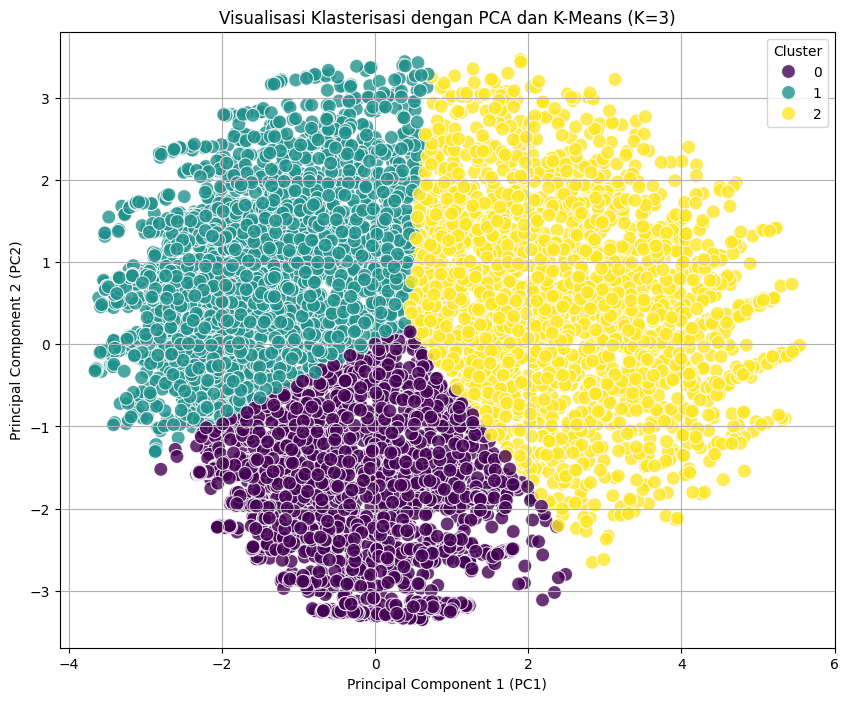

Grafik Visualisasi Klaster telah ditampilkan.


In [ ]:
print("\n---  Visualisasi Hasil Clustering ---")

# Tambahkan label cluster ke DataFrame hasil PCA untuk visualisasi
df_pca_clustering_display['Cluster'] = cluster_labels_final

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca_clustering_display,
                palette='viridis', s=100, alpha=0.8)
plt.title(f'Visualisasi Klasterisasi dengan PCA dan K-Means (K={optimal_k_chosen})')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()
print("Grafik Visualisasi Klaster telah ditampilkan.")

Evaluasi Model: Silhouette Score Akhir

In [ ]:
print("\n--- Tahap 10: Evaluasi Model (Silhouette Score) ---")
final_silhouette_score = silhouette_score(X_pca_clustering, cluster_labels_final)
print(f"Silhouette Score untuk K={optimal_k_chosen}: {final_silhouette_score:.4f}")


--- Tahap 10: Evaluasi Model (Silhouette Score) ---
Silhouette Score untuk K=3: 0.4177


Menyimpan Model dan Preparation untuk Deployment

In [ ]:
# File .pkl pertama: Semua objek pra-pemrosesan dan PROFIL CLUSTER
preprocessing_assets_clustering = {
    'total_charges_mean': total_charges_mean_value_clustering,
    'label_encoders': label_encoders_dict_clustering,
    'standard_scaler': scaler_standard_clustering,
    'pca': pca_clustering,
    'cluster_profiles_df': cluster_summary_df.to_dict() # Simpan DataFrame profil sebagai dictionary
                                                         # agar mudah diakses di Streamlit
}

try:
    joblib.dump(preprocessing_assets_clustering, 'preprocessing_assets_clustering.pkl')
    print("File 'preprocessing_assets_clustering.pkl' (berisi semua scaler, encoders, PCA, mean, dan profil cluster) telah disimpan.")
except Exception as e:
    print(f"Gagal menyimpan preprocessing_assets_clustering.pkl: {e}")

# File .pkl kedua: Model K-Means
try:
    joblib.dump(kmeans_final_model, 'model_kmeans.pkl')
    print("File 'model_kmeans.pkl' (model K-Means) telah disimpan.")
except Exception as e:
    print(f"Gagal menyimpan model_kmeans.pkl: {e}")

File 'preprocessing_assets_clustering.pkl' (berisi semua scaler, encoders, PCA, mean, dan profil cluster) telah disimpan.
File 'model_kmeans.pkl' (model K-Means) telah disimpan.


#### **Deployment**

Save model

Konfigurasi Streamlit untuk deployment (k-means)

In [ ]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 83.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 115.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.1 MB/s eta 0:00:00


In [ ]:
pip install joblib scikit-learn pandas numpy matplotlib seaborn imbalanced-learn

Konfigurasi Streamlit untuk deployment (klasifikasi)

In [ ]:
pip install pyngrok

Ekspos streamlit local ke public (Supervised Learning)

In [ ]:
# ============== KODE UNTUK DIJALANKAN DALAM SATU SEL JUPYTER NOTEBOOK ==============

from pyngrok import ngrok, conf
import threading
import time
import os
import subprocess
# import shlex # Tidak wajib jika nama file tidak mengandung spasi

# --- 1. Konfigurasi Ngrok ---

NGROK_AUTH_TOKEN = "2wvSlvhaWQYM8kbi6ybkyXyIXrC_3q95trDPYwijw4o2WuEqW"
if NGROK_AUTH_TOKEN:
    try:
        conf.get_default().auth_token = NGROK_AUTH_TOKEN
        print("INFO: Authtoken ngrok telah dikonfigurasi.")
    except Exception as e_conf:
        print(f"WARNING: Gagal mengkonfigurasi authtoken ngrok secara programatik: {e_conf}")
        print("Pastikan Anda sudah mengkonfigurasi authtoken via CLI ngrok: ngrok config add-authtoken <TOKEN_ANDA>")
else:
    print("PERINGATAN: Authtoken ngrok tidak diset. Tunnel mungkin memiliki batasan atau gagal.")

# --- 2. Nama File Aplikasi Streamlit Anda ---

STREAMLIT_PYTHON_FILE = "app_klasifikasi_churn.py"

# --- 3. Fungsi untuk Menjalankan Server Streamlit ---
def run_streamlit_server(streamlit_file_path):
    if not os.path.exists(streamlit_file_path):
        print(f"!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
        print(f"ERROR FATAL: File Streamlit '{streamlit_file_path}' TIDAK DITEMUKAN!")
        print(f"Pastikan file tersebut ada di direktori yang sama dengan notebook ini.")
        print(f"Silakan buat file '{streamlit_file_path}' berisi kode aplikasi Streamlit Anda.")
        print(f"!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
        return

    # Perintah untuk menjalankan Streamlit
    command = ["streamlit", "run", streamlit_file_path, "--server.port", "8501", "--server.headless", "true"]
    print(f"Menjalankan Streamlit dengan perintah: {' '.join(command)}")
    try:
        process = subprocess.Popen(command)
        process.wait() # Tunggu proses Streamlit selesai (ini akan terus berjalan)
    except FileNotFoundError:
        print("ERROR: Perintah 'streamlit' tidak ditemukan. Pastikan Streamlit terinstal dan ada di PATH.")
    except Exception as e:
        print(f"ERROR saat mencoba menjalankan Streamlit: {e}")

# --- 4. Menjalankan Streamlit di Thread Terpisah ---
# Daemon=True agar thread ini otomatis berhenti saat main program berhenti
streamlit_thread = threading.Thread(target=run_streamlit_server, args=(STREAMLIT_PYTHON_FILE,), daemon=True)
streamlit_thread.start()

print("Server Streamlit sedang dimulai di background (beri waktu ~10-15 detik)...")
time.sleep(15) # Beri waktu yang cukup untuk Streamlit siap

# --- 5. Memulai Tunnel Ngrok ---
public_url_ngrok = None
try:
    print("Mencoba membuka tunnel ngrok ke localhost:8501...")

    public_url_ngrok = ngrok.connect(addr="8501", proto="http")
    print(f"========================================================================")
    print(f"🎉 Aplikasi Streamlit Anda SEHARUSNYA dapat diakses publik di: {public_url_ngrok}")
    print(f"========================================================================")
    print("\nCATATAN PENTING:")
    print("1. Sel Jupyter Notebook ini akan terus berjalan untuk menjaga tunnel ngrok tetap aktif.")
    print("2. Untuk MENGHENTIKAN semuanya (Streamlit & ngrok), Anda perlu 'Interrupt the kernel'")
    print("   dari menu 'Kernel' di Jupyter Notebook Anda (tombol stop ■ atau menu Kernel > Interrupt).")
    print("3. Jika ada error ERR_NGROK_108, berarti Anda masih punya sesi ngrok lain yang aktif.")
    print("   Segera cek dan hentikan dari dashboard ngrok: https://dashboard.ngrok.com/agents")
    print("========================================================================")

    # Loop tak terbatas untuk menjaga sel tetap berjalan dan tunnel tetap aktif
    while True:
        time.sleep(60)

except Exception as e_ngrok: # Menangkap semua jenis exception dari ngrok
    print(f"!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
    print(f"TERJADI KESALAHAN DENGAN NGROK: {e_ngrok}")
    print(f"!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
    print("Saran:")
    print("- Jika ini error 'ERR_NGROK_108', buka https://dashboard.ngrok.com/agents dan hentikan semua sesi aktif.")
    print("- Pastikan token ngrok Anda benar dan tidak ada batasan akun yang terlampaui.")
    print("- Pastikan koneksi internet Anda stabil.")
    print("- Coba restart kernel Jupyter dan jalankan sel ini lagi setelah memastikan kondisi di atas.")
finally:
    # Bagian ini akan dijalankan jika ada error atau kernel dihentikan
    if public_url_ngrok:
        print(f"Mencoba menutup tunnel ngrok: {public_url_ngrok}")
        try:
            ngrok.disconnect(str(public_url_ngrok))
        except Exception as e_disconnect:
            print(f"Error saat disconnect ngrok (mungkin sudah tertutup): {e_disconnect}")
    try:
        ngrok.kill() # Memastikan semua proses ngrok yang dimulai oleh pyngrok dihentikan
        print("Proses ngrok telah dihentikan.")
    except Exception as e_kill:
        print(f"Error saat kill ngrok (mungkin sudah tidak berjalan): {e_kill}")
    print("Sesi Selesai. Interupsi kernel jika sel belum berhenti sepenuhnya.")

# ============== AKHIR KODE UNTUK SEL JUPYTER NOTEBOOK ==============

INFO: Authtoken ngrok telah dikonfigurasi.
Server Streamlit sedang dimulai di background (beri waktu ~10-15 detik)...
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
ERROR FATAL: File Streamlit 'app_klasifikasi_churn.py' TIDAK DITEMUKAN!
Pastikan file tersebut ada di direktori yang sama dengan notebook ini.
Silakan buat file 'app_klasifikasi_churn.py' berisi kode aplikasi Streamlit Anda.
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Mencoba membuka tunnel ngrok ke localhost:8501...
🎉 Aplikasi Streamlit Anda SEHARUSNYA dapat diakses publik di: NgrokTunnel: "https://5ca8-34-125-48-155.ngrok-free.app" -> "http://localhost:8501"

CATATAN PENTING:
1. Sel Jupyter Notebook ini akan terus berjalan untuk menjaga tunnel ngrok tetap aktif.
2. Untuk MENGHENTIKAN semuanya (Streamlit & ngrok), Anda perlu 'Interrupt the kernel'
   dari menu 'Kernel' di Jupyter Notebook Anda (tombol stop ■ atau menu Kernel > Interrupt).
3. Jika ada error ERR_NGRO

Mencoba menutup tunnel ngrok: NgrokTunnel: "https://5ca8-34-125-48-155.ngrok-free.app" -> "http://localhost:8501"
Error saat disconnect ngrok (mungkin sudah tertutup): Remote end closed connection without response
Proses ngrok telah dihentikan.
Sesi Selesai. Interupsi kernel jika sel belum berhenti sepenuhnya.


KeyboardInterrupt: 

Ekspos streamlit local ke public (Unsupervised Learning)

In [ ]:
# ============== KODE UNTUK DIJALANKAN DALAM SATU SEL JUPYTER NOTEBOOK ==============

from pyngrok import ngrok, conf
import threading
import time
import os
import subprocess

# --- 1. Konfigurasi Ngrok ---

NGROK_AUTH_TOKEN = "2wvSlvhaWQYM8kbi6ybkyXyIXrC_3q95trDPYwijw4o2WuEqW"
if NGROK_AUTH_TOKEN:
    try:
        conf.get_default().auth_token = NGROK_AUTH_TOKEN
        print("INFO: Authtoken ngrok telah dikonfigurasi.")
    except Exception as e_conf:
        print(f"WARNING: Gagal mengkonfigurasi authtoken ngrok secara programatik: {e_conf}")
        print("Pastikan Anda sudah mengkonfigurasi authtoken via CLI ngrok: ngrok config add-authtoken <TOKEN_ANDA>")
else:
    print("PERINGATAN: Authtoken ngrok tidak diset. Tunnel mungkin memiliki batasan atau gagal.")

# --- 2. Nama File Aplikasi Streamlit Anda ---

STREAMLIT_PYTHON_FILE = "app_segmentasi_pelanggan.py" # <--- PASTIKAN NAMA FILE INI SESUAI

# --- 3. Fungsi untuk Menjalankan Server Streamlit ---
def run_streamlit_server(streamlit_file_path):
    if not os.path.exists(streamlit_file_path):
        print(f"!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
        print(f"ERROR FATAL: File Streamlit '{streamlit_file_path}' TIDAK DITEMUKAN!")
        print(f"Pastikan file tersebut ada di direktori yang sama dengan notebook ini.")
        print(f"Silakan buat file '{streamlit_file_path}' berisi kode aplikasi Streamlit Anda.")
        print(f"!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
        return

    command = ["streamlit", "run", streamlit_file_path, "--server.port", "8501", "--server.headless", "true"]
    print(f"Menjalankan Streamlit dengan perintah: {' '.join(command)}")
    try:
        process = subprocess.Popen(command)
        process.wait()
    except FileNotFoundError:
        print("ERROR: Perintah 'streamlit' tidak ditemukan. Pastikan Streamlit terinstal dan ada di PATH.")
    except Exception as e:
        print(f"ERROR saat mencoba menjalankan Streamlit: {e}")

# --- 4. Menjalankan Streamlit di Thread Terpisah ---
streamlit_thread = threading.Thread(target=run_streamlit_server, args=(STREAMLIT_PYTHON_FILE,), daemon=True)
streamlit_thread.start()

print("Server Streamlit sedang dimulai di background (beri waktu ~10-15 detik)...")
time.sleep(15) # Beri waktu yang cukup untuk Streamlit siap

# --- 5. Memulai Tunnel Ngrok ---
public_url_ngrok = None
try:
    print("Mencoba membuka tunnel ngrok ke localhost:8501...")

    public_url_ngrok = ngrok.connect(addr="8501", proto="http")
    print(f"========================================================================")
    print(f"🎉 Aplikasi Streamlit Anda SEHARUSNYA dapat diakses publik di: {public_url_ngrok}")
    print(f"========================================================================")
    print("\nCATATAN PENTING:")
    print("1. Sel Jupyter Notebook ini akan terus berjalan untuk menjaga tunnel ngrok tetap aktif.")
    print("2. Untuk MENGHENTIKAN semuanya (Streamlit & ngrok), Anda perlu 'Interrupt the kernel'")
    print("   dari menu 'Kernel' di Jupyter Notebook Anda (tombol stop ■ atau menu Kernel > Interrupt).")
    print("3. Jika ada error ERR_NGROK_108, berarti Anda masih punya sesi ngrok lain yang aktif.")
    print("   Segera cek dan hentikan dari dashboard ngrok: https://dashboard.ngrok.com/agents")
    print("========================================================================")

    while True:
        time.sleep(60)

except Exception as e_ngrok:
    print(f"!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
    print(f"TERJADI KESALAHAN DENGAN NGROK: {e_ngrok}")
    print(f"!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
    print("Saran:")
    print("- Jika ini error 'ERR_NGROK_108', buka https://dashboard.ngrok.com/agents dan hentikan semua sesi aktif.")
    print("- Pastikan token ngrok Anda benar dan tidak ada batasan akun yang terlampaui.")
    print("- Pastikan koneksi internet Anda stabil.")
    print("- Coba restart kernel Jupyter dan jalankan sel ini lagi setelah memastikan kondisi di atas.")
finally:
    if public_url_ngrok:
        print(f"Mencoba menutup tunnel ngrok: {public_url_ngrok}")
        try:
            ngrok.disconnect(str(public_url_ngrok))
        except Exception as e_disconnect:
            print(f"Error saat disconnect ngrok (mungkin sudah tertutup): {e_disconnect}")
    try:
        ngrok.kill()
        print("Proses ngrok telah dihentikan.")
    except Exception as e_kill:
        print(f"Error saat kill ngrok (mungkin sudah tidak berjalan): {e_kill}")
    print("Sesi Selesai. Interupsi kernel jika sel belum berhenti sepenuhnya.")

# ============== AKHIR KODE UNTUK SEL JUPYTER NOTEBOOK ==============